# Problem Statement

To predict the sale prices for the houses in King County, which includes Seattle. The dataset includes homes sold between May 2014 and May 2015.

Data Source: https://data.kingcounty.gov/

Data Structure: The Dataset has 21 features and 21613 observations.

Methodology: The dataset has been split into train, validation and test, with the Test data having 2217 observations, as against train and validation data having 9761 and 9635 observations respectively. We train the model on the Train data. Evaluate several models on the Validation data. The final model is then used for predicting the target variable (Price) for the Test data.

Tools Used : Python

Libraries Used: pandas, numpy, seaborn, matplotlib.pyplot, ppscore, sklearn, warnings.

Evaluation Metrics Used: R-squared value and Root Mean Square Error Score.

## Data Preparation & Exploration

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import ppscore as pps
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor  
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree

In [2]:
# Reading Data
train = pd.read_csv(r'C:\Users\WIN8\Desktop\KC House Prediction\wk3_kc_house_train_data.csv')
validate = pd.read_csv(r"C:\Users\WIN8\Desktop\KC House Prediction\wk3_kc_house_valid_data.csv")
test = pd.read_csv(r"C:\Users\WIN8\Desktop\KC House Prediction\wk3_kc_house_test_data.csv")

In [3]:
# Making a copy of the data
train_original = train.copy()
validate_original = validate.copy()
test_original = test.copy()

In [4]:
# Checking Dimensions
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The validate data has {0} rows and {1} columns'.format(validate.shape[0],validate.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 9761 rows and 21 columns
----------------------------
The validate data has 9635 rows and 21 columns
----------------------------
The test data has 2217 rows and 21 columns


In [5]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Checking Data Types of the variables
train.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [8]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


## Univariate Analysis

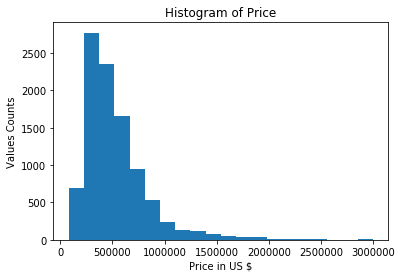

In [59]:
# Plotting a Histogram for Target Variable.
plt.hist(train.price ,bins=20, range = (80000,3000000), label = "Histogram of Price", histtype = "bar")
plt.title('Histogram of Price')
plt.xlabel('Price in US $')
plt.ylabel('Values Counts')

plt.show()

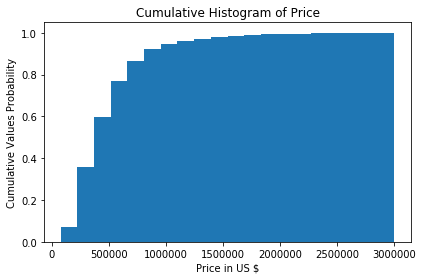

In [60]:
# Plotting a Normalized Cumulative Histogram for Target Variable
plt.hist(train.price ,bins=20, range = (80000,3000000), label = "Price", histtype = "bar", cumulative = True,normed = True)
plt.title('Cumulative Histogram of Price')
plt.xlabel('Price in US $')
plt.ylabel('Cumulative Values Probability')
plt.tight_layout()

##### On plotting the above Histograms, we observe that approximately 90% of the houses in the train data are priced less than or equal to US$1 million. Further, the price variable (target) is skewed to the right. We will need to log transform this variable so that it becomes normally distributed. 
##### A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Constant Variance here means that when we plot the individual error against the predicted value, the variance of the predicted error value should be constant. Alternatively, we can also confirm this skewed behavior using the skewness metric.

In [11]:
# Calculating the Skewness
print ("The Skewness of Price is {}".format(train['price'].skew()))

The Skewness of Price is 4.2980618120838665


The Skewness is 0.45826266821334627


Text(0, 0.5, 'Values Probability')

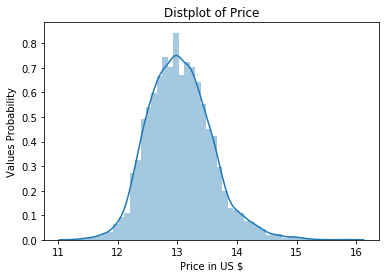

In [62]:
# Log transforming the Target Variable
log_price = np.log(train['price'])
print ('The Skewness is', log_price.skew())
sns.distplot(log_price)
plt.title('Distplot of Price')
plt.xlabel('Price in US $')
plt.ylabel('Values Probability')

The Log transformation helped us to fix the skewness of the Target Variable, and it now looks closer to a normal distribution.

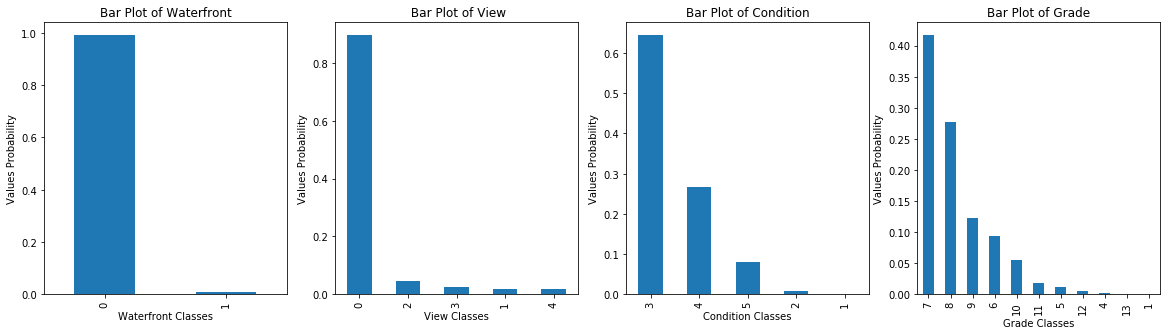

In [13]:
# Visualizing the Categorical Variables.
plt.figure(1)
plt.subplot(141)
train["waterfront"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Waterfront")
plt.xlabel('Waterfront Classes')
plt.ylabel('Values Probability')
plt.subplot(142)
train["view"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = " Bar Plot of View")
plt.xlabel('View Classes')
plt.ylabel('Values Probability')
plt.subplot(143)
train["condition"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Condition")
plt.xlabel('Condition Classes')
plt.ylabel('Values Probability')
plt.subplot(144)
train["grade"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Grade")
plt.xlabel('Grade Classes')
plt.ylabel('Values Probability')
plt.show()

The Bar plot of Waterfront shows that 99% of the houses in the train dataset do not have a waterfront.

The Bar plot of View shows that approxiamtely 95% of the houses in the train dataset have a view class of 0. Since this variable can have any meaning, we really cannot make any assumptions based on its values. Hence, we will ignore this variable.

The Bar plot of Condition shows that approxiamtely 65% of the houses in the train dataset have a Condition class of 3, followed by Condition Class 4 with 28% of the houses.

The Bar plot of Grade shows that approximately 43% of the houses in the train dataset have a Grade class of 7, followed by Grade class 8 with approxiamtelt 28% of the houses.

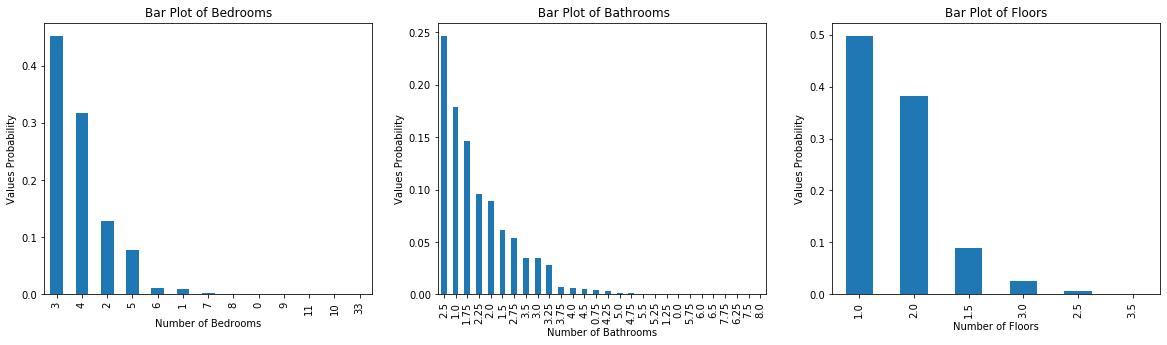

In [14]:
# Visualizing the Discrete Numerical Variables
plt.figure(1)
plt.subplot(131)
train["bedrooms"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Bedrooms")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Values Probability')
plt.subplot(132)
train["bathrooms"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = " Bar Plot of Bathrooms")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Values Probability')
plt.subplot(133)
train["floors"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Floors")
plt.xlabel('Number of Floors')
plt.ylabel('Values Probability')
plt.show()

More than 45% of the houses have 3 bedrooms, followed by approximately 32% of the houses having 4 bedrooms.

24% of the houses have 2.5 bathrooms, followed by 14% of the houses having 1 bathroom.

There is 50% probability of a house being single storied. 

Let us check the skewness of these variables, and see if we need any transformations.

In [15]:
# Calculating the Skewness
print ("The Skewness of Bedrooms is {}".format(train['bedrooms'].skew()))
print ('----------------------------')
print ("The Skewness of Bathrooms is {}".format(train['bathrooms'].skew()))
print ('----------------------------')
print ("The Skewness of Floors is {}".format(train['floors'].skew()))

The Skewness of Bedrooms is 3.4598487211463507
----------------------------
The Skewness of Bathrooms is 0.5578776682173855
----------------------------
The Skewness of Floors is 0.5966030173126058


We can see that the Bedrooms Variable is skewed to the right, but log transformation of a discrete variable is not much helpful.

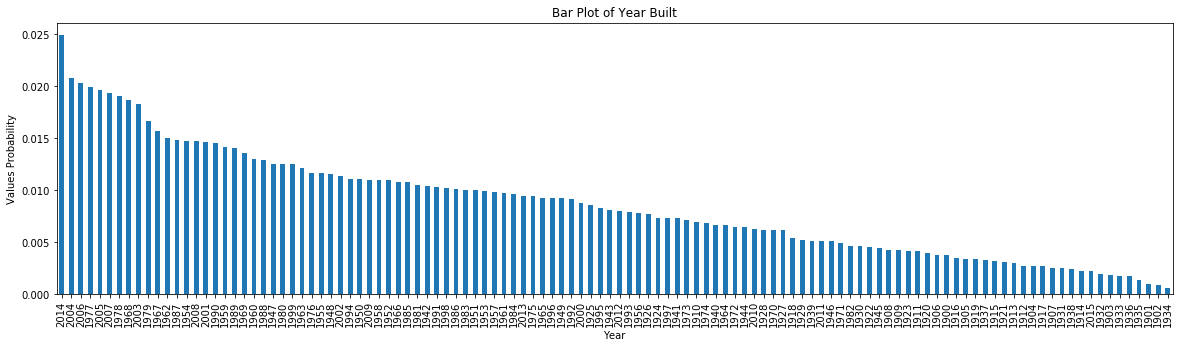

In [16]:
# Visualizing the Year Built Variable
train["yr_built"].value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Year Built")
plt.xlabel('Year')
plt.ylabel('Values Probability')
plt.show()

As we see above, the Year Built Variable is skewed to the right. 25% of the houses sold are built in 2014. The least number of houses sold are those that were built in 1934. Intuitively, a newly built house should have a higher price. We will see that during the Bivariate Analysis. 

In [17]:
# Visualizing the Year Renovated Variable
train["yr_renovated"].value_counts(normalize = True, sort = True)

0       0.956869
2014    0.004303
2000    0.001947
2005    0.001742
2003    0.001639
          ...   
1957    0.000102
1955    0.000102
1971    0.000102
1979    0.000102
1940    0.000102
Name: yr_renovated, Length: 65, dtype: float64

As we can see that approxiately 96% of the houses were not renovated. Hence, we dont see much significance of this variable.

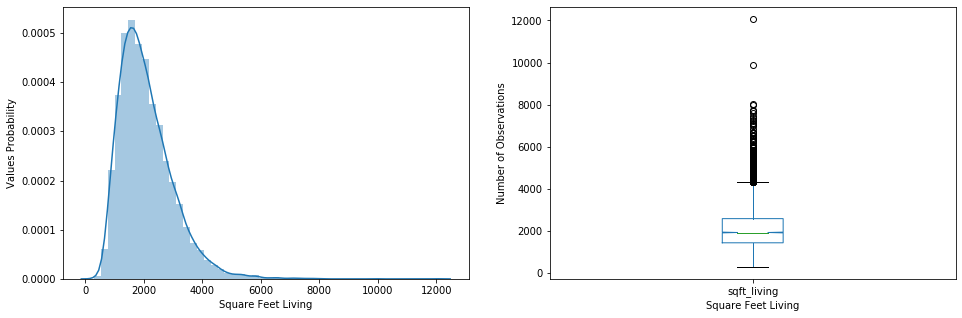

In [18]:
# Visualizing the Square Feet Living Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['sqft_living'])
plt.xlabel('Square Feet Living')
plt.ylabel('Values Probability')
plt.subplot(122)
train['sqft_living'].plot.box(figsize = (16,5), notch = True)
plt.xlabel('Square Feet Living')
plt.ylabel('Number of Observations')
plt.show()

Most of the houses in our train dataset have a square feet living area less than 4000 square feet. The box plot shows some outliers. The median square feet living area is around 2000 square feet. As computed earlier, the mean square feet living area is 2084 square feet approxiamtely.

In [19]:
# Calculating the Skewness
print ("The Skewness of Square Feet Living is {}".format(train['sqft_living'].skew()))

The Skewness of Square Feet Living is 1.425825591484237


The Skewness is -0.043863558865204176


Text(0, 0.5, 'Values Probability')

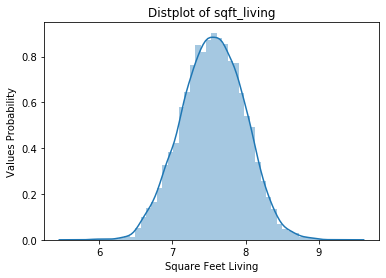

In [64]:
# Log transforming the Variable
log_sqft_living = np.log(train['sqft_living'])
print ('The Skewness is', log_sqft_living.skew())
sns.distplot(log_sqft_living)
plt.title('Distplot of sqft_living')
plt.xlabel('Square Feet Living')
plt.ylabel('Values Probability')

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. 

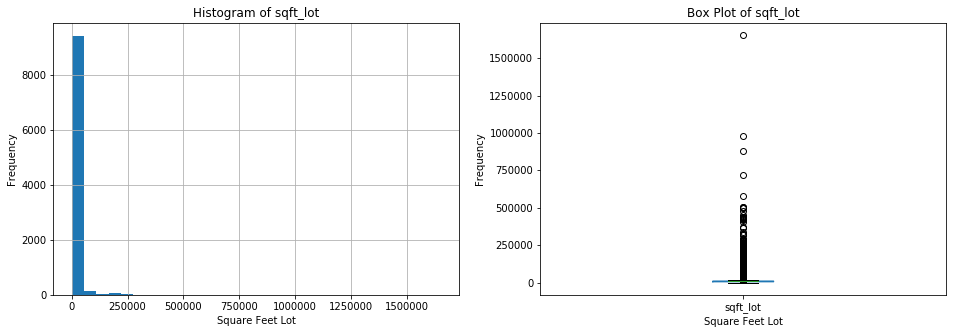

In [66]:
# Visualizing the Square Feet Lot Variable
plt.figure(1)
plt.subplot(121)
train["sqft_lot"].hist(bins = 30)
plt.title('Histogram of sqft_lot')
plt.xlabel('Square Feet Lot')
plt.ylabel('Frequency')
plt.subplot(122)
train['sqft_lot'].plot.box(figsize = (16,5), notch = True)
plt.title('Box Plot of sqft_lot')
plt.xlabel('Square Feet Lot')
plt.ylabel('Frequency')
plt.show()

As we see above, most of the houses in our dataset has Lot size of less than 62,500 square feet. There do exist some outliers in the variable.

In [22]:
# Calculating the Skewness
print ("The Skewness of Square Feet Lot is {}".format(train['sqft_lot'].skew()))

The Skewness of Square Feet Lot is 13.60387975464059


The Skewness is 1.0363186056450515


Text(0, 0.5, 'Frequency')

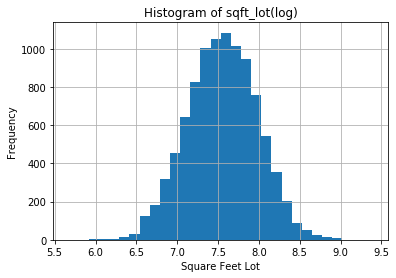

In [68]:
# Log transforming the Variable
log_sqft_lot = np.log(train['sqft_lot'])
print ('The Skewness is', log_sqft_lot.skew())
log_sqft_living.hist(bins = 30)
plt.title('Histogram of sqft_lot(log)')
plt.xlabel('Square Feet Lot')
plt.ylabel('Frequency')

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. 

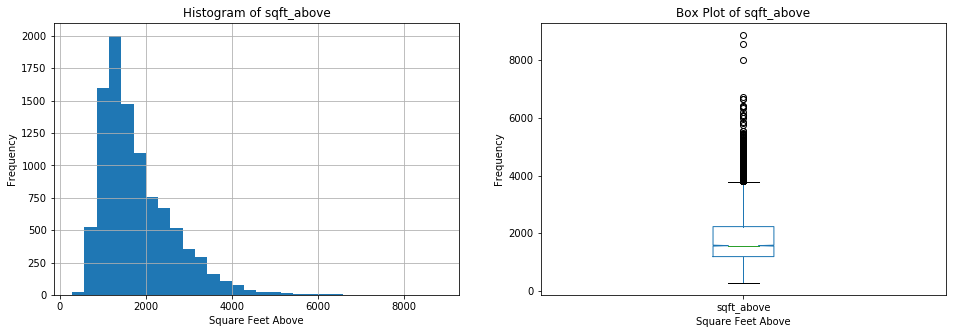

In [69]:
# Visualizing the Square Feet Above Variable
plt.figure(1)
plt.subplot(121)
train["sqft_above"].hist(bins = 30)
plt.title('Histogram of sqft_above')
plt.xlabel('Square Feet Above')
plt.ylabel('Frequency')
plt.subplot(122)
train['sqft_above'].plot.box(figsize = (16,5), notch = True)
plt.title('Box Plot of sqft_above')
plt.xlabel('Square Feet Above')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Calculating the Skewness
print ("The Skewness of Square Feet Above is {}".format(train['sqft_above'].skew()))

The Skewness of Square Feet Above is 1.4527483169440447


The Skewness is 0.2511688687536884


Text(0, 0.5, 'Frequency')

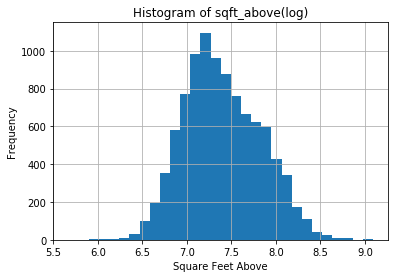

In [70]:
# Log transforming the Variable
log_sqft_above = np.log(train['sqft_above'])
print ('The Skewness is', log_sqft_above.skew())
log_sqft_above.hist(bins = 30)
plt.title('Histogram of sqft_above(log)')
plt.xlabel('Square Feet Above')
plt.ylabel('Frequency')

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. 

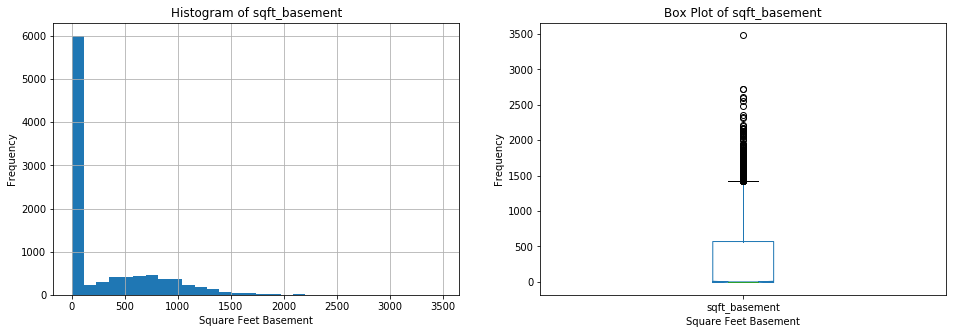

In [71]:
# Visualizing the Square Feet Above Variable
plt.figure(1)
plt.subplot(121)
train["sqft_basement"].hist(bins = 30)
plt.title('Histogram of sqft_basement')
plt.xlabel('Square Feet Basement')
plt.ylabel('Frequency')
plt.subplot(122)
train['sqft_basement'].plot.box(figsize = (16,5), notch = True)
plt.title('Box Plot of sqft_basement')
plt.xlabel('Square Feet Basement')
plt.ylabel('Frequency')
plt.show()

The Square Feet Basement variable looks skewed to the right. But log transformation is not possible, as most of the houses do not have a basement, and thus have a 0 value for the variable.

Text(0, 0.5, 'Frequency')

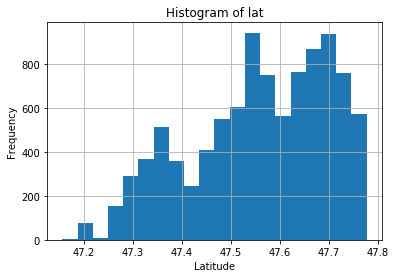

In [72]:
# Visualizing the Latitude Variable
train["lat"].hist(bins = 20)
plt.title('Histogram of lat')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

Our train dataset has a major coverage from 47.25 to 47.78 degree latitude.

Text(0, 0.5, 'Frequency')

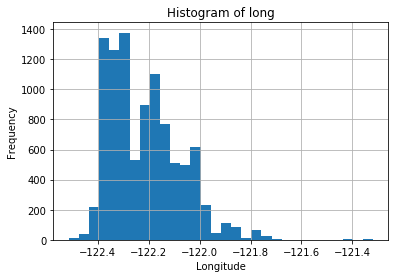

In [73]:
# Visualizing the Longitude Variable
train["long"].hist(bins = 30)
plt.title('Histogram of long')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

Our train dataset has a major coverage from -122.4 to -122.0 degree longitude. Also approximately 56% of the houses lie within this range.

Text(0, 0.5, 'Frequency')

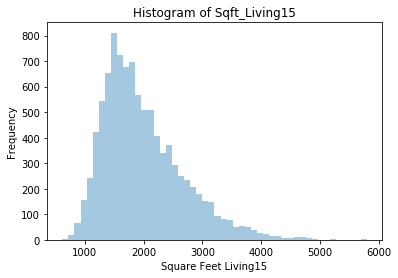

In [74]:
# Visualizing the Square Feet Living 15 Variable.
sns.distplot(train.sqft_living15, hist = True, kde = False)
plt.title('Histogram of Sqft_Living15')
plt.xlabel('Square Feet Living15')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

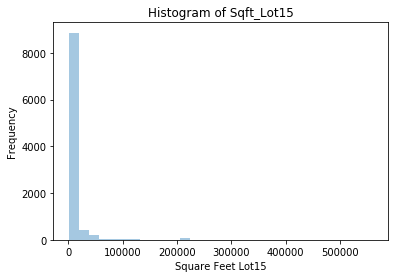

In [75]:
# Visualizing the Square Feet Lot 15 Variable.
sns.distplot(train.sqft_lot15, hist = True, kde = False, bins = 30)
plt.title('Histogram of Sqft_Lot15')
plt.xlabel('Square Feet Lot15')
plt.ylabel('Frequency')

The sqft_living15 & sqft_lot15 variables look skewed to the right. We need to understand how much these variables changed from the orignal respective areas when the house was built.

In [76]:
sqft_living_change = train.sqft_living - train.sqft_living15
sqft_lot_change = train.sqft_lot - train.sqft_lot15

In [77]:
# Encoding Sqft Living Variable -> 1 for additions, 0 for no change and -1 for reduction in square feet area.
sqft_living_15 = []
for i in sqft_living_change:
    if i < 0:
        i = -1
        sqft_living_15.append(i)
    elif i > 0:
        i = 1
        sqft_living_15.append(i)
    else:
        i = 0
        sqft_living_15.append(i)

# Encoding Sqft Lot Variable -> 1 for additions, 0 for no change and -1 for reduction in square feet area.
sqft_lot_15 = []
for i in sqft_lot_change:
    if i < 0:
        i = -1
        sqft_lot_15.append(i)
    elif i > 0:
        i = 1
        sqft_lot_15.append(i)
    else:
        i = 0
        sqft_lot_15.append(i)

In [78]:
# Creating a dataframe of the encoded variables.
sqft_change = pd.DataFrame()
sqft_change['sqft_living_15'] = sqft_living_15
sqft_change['sqft_lot_15'] = sqft_lot_15

In [79]:
# Visualizing the relationship
pd.crosstab(sqft_change.sqft_lot_15, sqft_change.sqft_living_15, normalize = True)

sqft_living_15,-1,0,1
sqft_lot_15,,,
-1,0.185534,0.049278,0.163713
0,0.084827,0.022641,0.093638
1,0.159820,0.043643,0.196906


We can see that the sqft_living area for 43% of the houses has reduced as on date. The same has increased for 45% of the houses. Furthermore, only 12% of the houses reported no change in the sqft_living area.

For the sqft_lot15 variable,39.85% of the houses have a reduced area as on date, compared to 40% of the houses, which have seen an increment.Furthermore, only 20% approx of the houses reported no change.

It is very skeptical that only 12% & 20% of the houses have reported no change in sqft_living & sqft_lot areas respectively. Let us compare these variables with the yr_renovated variable to see whether any relationship can be established. It may happen that these changes are due to the renovation of the house.

In [80]:
# Encoding Year Renovation Variable ->  0 for no renovation and 1 for renovation irrespective of the year.
year_renovation = []
for i in train.yr_renovated:
    if i == 0:
        i = 0
        year_renovation.append(i)
    else:
        i = 1
        year_renovation.append(i)

In [81]:
# Adding the encoded variable in the dataframe created above.
sqft_change['year_renovation'] = year_renovation

In [82]:
# Visualizing the relationship with Year Renovated
pd.crosstab(sqft_change.year_renovation, sqft_change.sqft_living_15)

sqft_living_15,-1,0,1
year_renovation,,,
0,4053,1100,4187
1,146,28,247


In [83]:
#Visualizing the relationship with Year Renovated
pd.crosstab(sqft_change.year_renovation, sqft_change.sqft_lot_15)

sqft_lot_15,-1,0,1
year_renovation,,,
0,3723,1861,3756
1,167,102,152


On comparing the sqft_living15 and sqft_lot15 variable with yr_renovated, we cannot find any meaningful relationship. The crosstab shows that both the variables are not really affected by yr_renovated. 

Hence we omit these variables from our model.

The Number of Unique Zipcodes is 70.


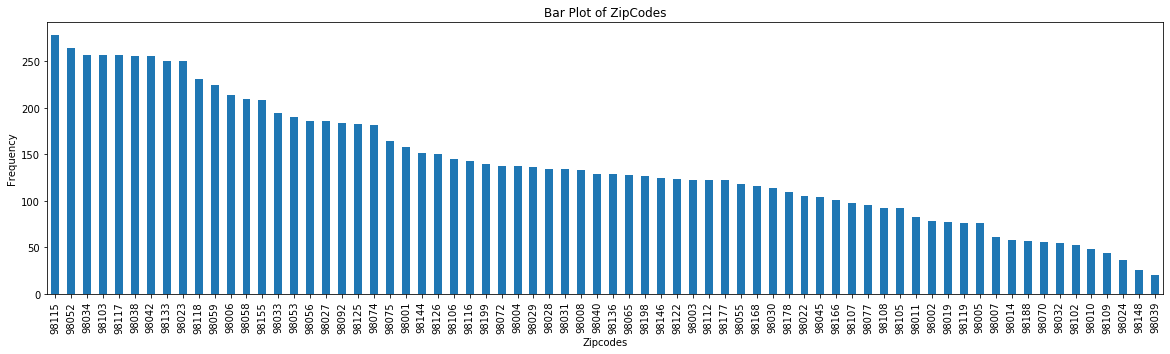

In [84]:
#Visualizing the ZipCode Variable
unique_zipcodes = []
for i in train.zipcode:
    if i not in unique_zipcodes:
        unique_zipcodes.append(i)
len(unique_zipcodes)
print ("The Number of Unique Zipcodes is {}.".format(len(unique_zipcodes)))

train.zipcode.value_counts(normalize = False).plot.bar(figsize = (20,5), title = "Bar Plot of ZipCodes")
plt.xlabel('Zipcodes')
plt.ylabel('Frequency')
plt.show()

The highest number of houses were sold in the zipcode 98115. The least were sold in 98039.

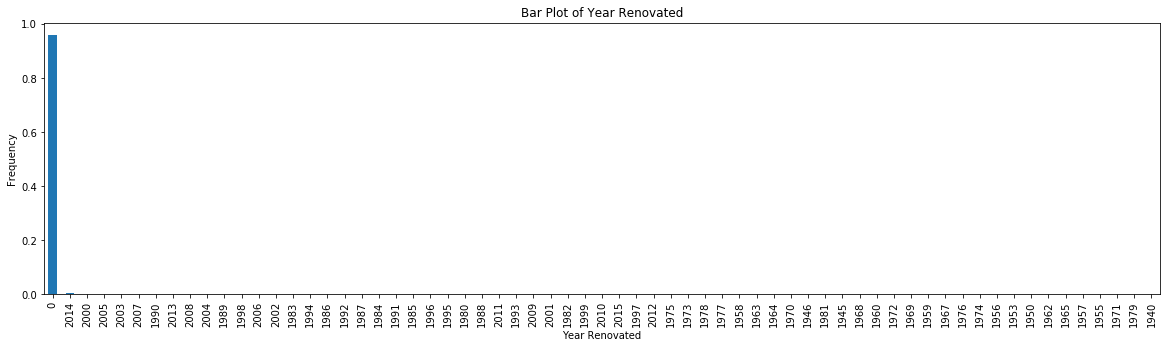

In [85]:
# Visualizing the yr_renovated Variable.
train.yr_renovated.value_counts(normalize = True).plot.bar(figsize = (20,5), title = "Bar Plot of Year Renovated")
plt.xlabel('Year Renovated')
plt.ylabel('Frequency')
plt.show()

As seen earlier, approxiamately 96% of the houses have not been renovated. 

In [86]:
# Calculating the number of houses that were not renovated
renovate_year = []
for i in train.yr_renovated:
    if i == 0:
        renovate_year.append(i)
len(renovate_year)

9340

Of the 4% or 421 houses renovated, 42 were renovated in the year 2014.

## Bivariate Analysis

Before we proceed with the Bivariate Analysis, let us check the Predictive Power Score for the Variables. Let’s say, we have two columns and want to calculate the predictive power score of A predicting B. In this case, we treat B as our target variable and A as our (only) feature. We can now calculate a cross-validated Decision Tree and calculate a suitable evaluation metric. When the target is Numeric, we can use a Decision Tree Regressor and calculate the Mean Absolute Error (MAE). When the target is Categoric, we can use a Decision Tree Classifier and calculate the weighted F1. It calculates the score on randomly selected 5000 rows at maximum. The PPS Matrix helps us to find non-linear relationships in the data.

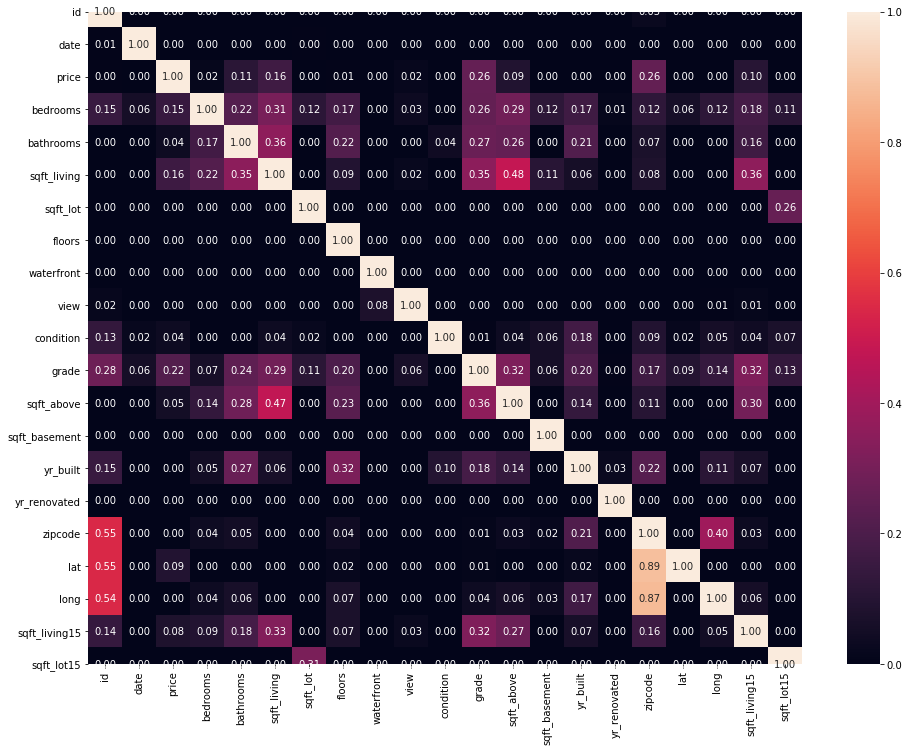

In [87]:
# Plotting PP Score Matrix.
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,12))
sns.heatmap(pps.matrix(train),annot=True,fmt=".2f")

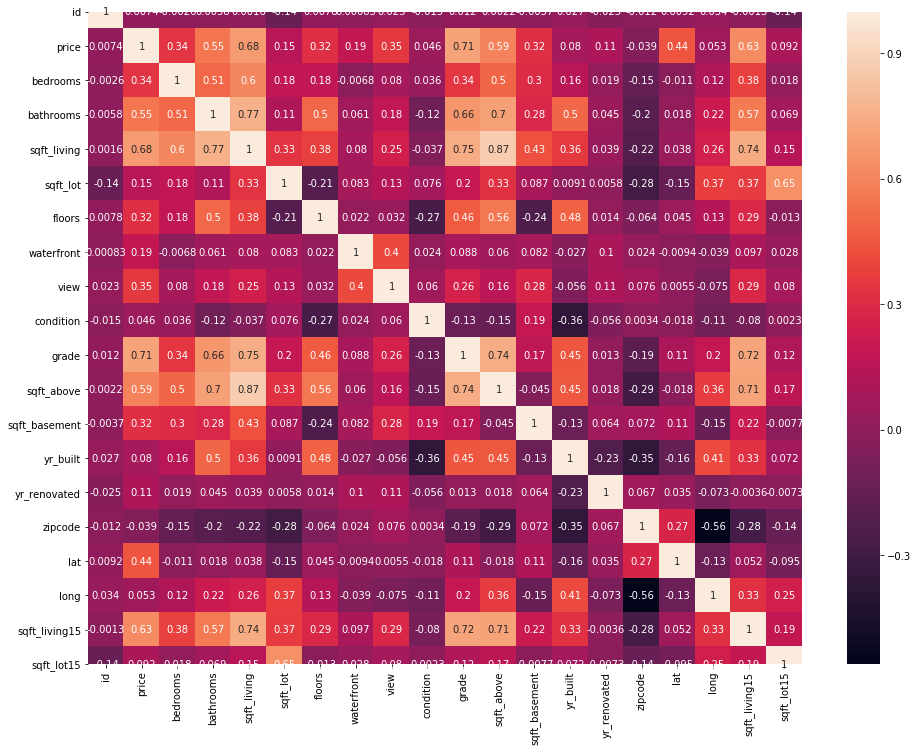

In [91]:
# Creating a dataframe with the transformed variables for computing the Correlation Matrix.
train_transformed = train.copy()
train_transformed.drop(["price","sqft_living","sqft_lot","sqft_above"], axis = 1)


train_transformed["price"] = log_price
train_transformed["sqft_living"] = log_sqft_living
train_transformed["sqft_lot"] = log_sqft_lot
train_transformed["sqft_above"] = log_sqft_above

# Plotting a Corelation Matrix
corrMatrix = train_transformed.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

A score of 0.47 has been assigned for sqft_living & sqft_above. This is an obvious relationship. Let us explore the relationships as defined by the Corelation Matrix. A point to notice here is that bedrooms and price have a Pearson score of only 0.34. The PPS Matrix and the Corelation Matrix shows that sqft_living and sqft_above are corelated with a Pearson score of 0.71 and a PPS score of sqft_living to sqft_above of 0.47. Hence we will choose one of these variables in our model.

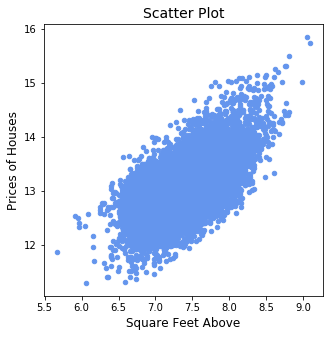

In [92]:
# Visualizing Price & Sqft_Above
train_transformed.plot(kind = "scatter",
         x = "sqft_above", y = "price",
         color = "cornflowerblue",
         figsize=(5,5))

plt.xlabel("Square Feet Above", fontsize = 12)
plt.ylabel("Prices of Houses", fontsize = 12)
plt.title("Scatter Plot", fontsize = 14)

plt.show()

We observe that there is a positive correlation between the price of a house and its sqft_living. This also is intuitive, as higher the sqft living area of the house, higher should be the price. A Pearson Score of 0.59 further strengthens the intuition.

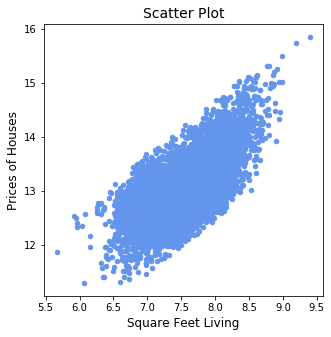

In [93]:
# Visualizing Price & Sqft_Living
train_transformed.plot(kind = "scatter",
         x = "sqft_living", y = "price",
         color = "cornflowerblue",
         figsize=(5,5))

plt.xlabel("Square Feet Living", fontsize = 12)
plt.ylabel("Prices of Houses", fontsize = 12)
plt.title("Scatter Plot", fontsize = 14)

plt.show()

As in the case of sqft_above, sqft_living is also correlated to price, having a Pearson score of 0.68.

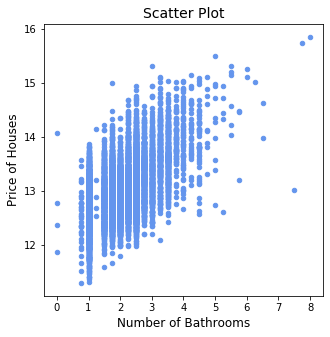

In [94]:
# Visualizing Price & bathrooms
train_transformed.plot(kind = "scatter",
         x = "bathrooms", y = "price",
         color = "cornflowerblue",
         figsize=(5,5))

plt.xlabel("Number of Bathrooms", fontsize = 12)
plt.ylabel("Price of Houses", fontsize = 12)
plt.title("Scatter Plot", fontsize = 14)

plt.show()

The above scatter plot shows that a positive correlation exists between price and bathrooms, with a Pearson score of 0.55. 

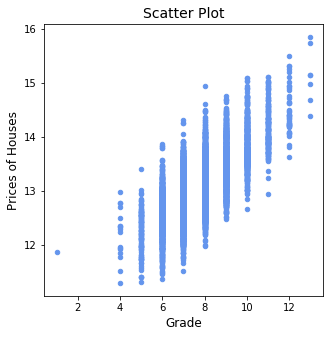

In [95]:
# Visualizing Price & Grade
train_transformed.plot(kind = "scatter",
         x = "grade", y = "price",
         color = "cornflowerblue",
         figsize=(5,5))

plt.xlabel("Grade", fontsize = 12)
plt.ylabel("Prices of Houses", fontsize = 12)
plt.title("Scatter Plot", fontsize = 14)

plt.show()

The scatter plot shows a postive correlation and linear relationship between the variables, with a Pearson score of 0.71.

Let us also visualize scatter plots of the other variables with price.


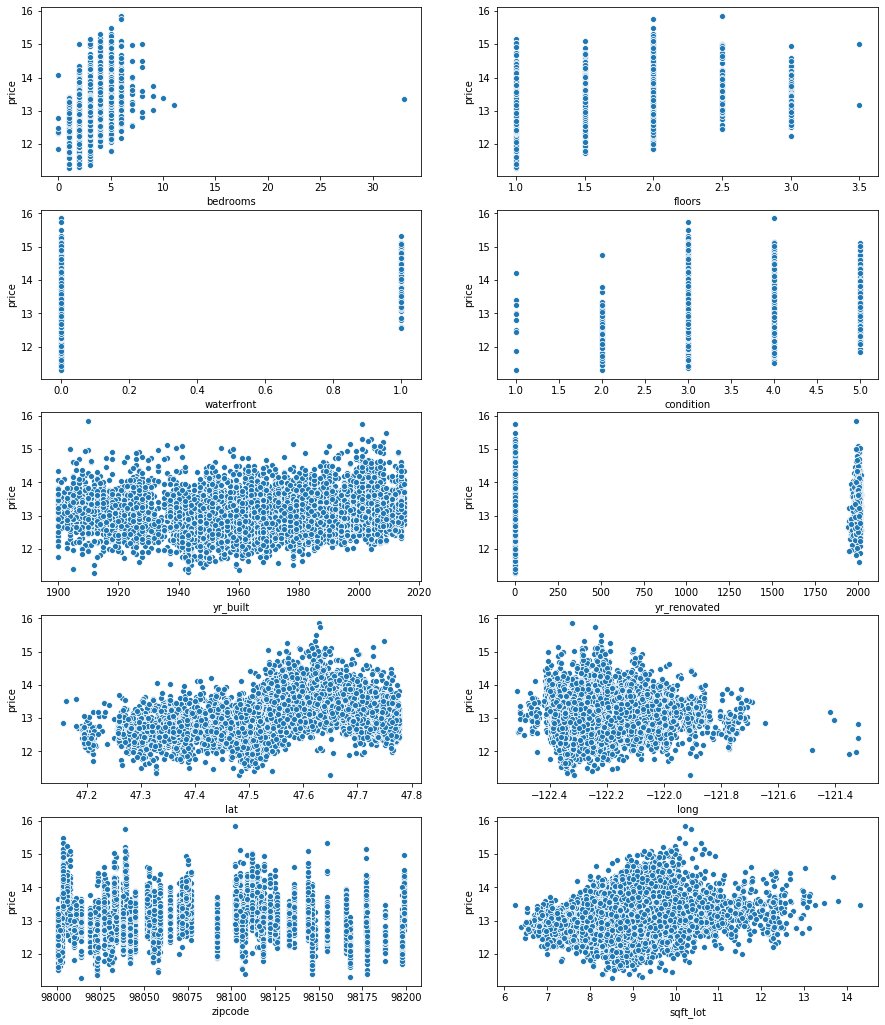

In [96]:
plt.figure(figsize = (15,18))
ax = plt.subplot(521)
sns.scatterplot(x = 'bedrooms', y = 'price', data=train_transformed, ax = ax)
ax = plt.subplot(522)
sns.scatterplot(x = 'floors', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(523)
sns.scatterplot(x = 'waterfront', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(524)
sns.scatterplot(x = 'condition', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(525)
sns.scatterplot(x = 'yr_built', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(526)
sns.scatterplot(x = 'yr_renovated', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(527)
sns.scatterplot(x = 'lat', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(528)
sns.scatterplot(x = 'long', y ='price', data=train_transformed, ax = ax)
ax = plt.subplot(529)
sns.scatterplot(x = 'zipcode', y ='price', data=train_transformed)
ax = plt.subplot(5,2,10)
sns.scatterplot(x = 'sqft_lot', y ='price', data=train_transformed)


plt.show()

The above scatter plots explain why these variables had a low Pearson score. We cannot see any significant linear relationship between price and floors, condition, waterfront, year renovated and zipcode respectively. However, some linearity in relationship can be observed between price and latitude, longitude, sqft_lot, year built and bedrooms respectively. 

We will not use the latitude and longitude variable for modelling, as it will make the model complex. These variables should ideally be used in conjunction. Moreover, they have been covered under the zipcode variable, which does not have a significant linear relationship with price.

## Model Building

#### Simple Linear Regression

In [97]:
train_transformed.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [98]:
# Dropping Variables
train_transformed = train_transformed.drop(['waterfront', 'view', 'id', 'date','floors', 'condition', 'sqft_basement',
                                           'yr_renovated', 'zipcode','lat','long','sqft_living15','sqft_lot15'], axis = 1)

In [99]:
# Preparing Validation Dataset and dropping variables.
validate_transformed = validate.copy()
validate_transformed['price'] = np.log(validate['price'])
validate_transformed['sqft_living'] = np.log(validate['sqft_living'])
validate_transformed['sqft_lot'] = np.log(validate['sqft_lot'])
validate_transformed['sqft_above'] = np.log(validate['sqft_above'])
validate_transformed = validate_transformed.drop(['waterfront', 'view', 'id', 'date','floors', 'condition', 'sqft_basement',
                                           'yr_renovated', 'zipcode','lat','long','sqft_living15','sqft_lot15'], axis = 1)

In [100]:
# Setting the Target Variable
y1 = np.array(train_transformed['price']).reshape(9761,1)
y2 = np.array(validate_transformed['price']).reshape(9635,1)

# Segregating Independent Variables in Train Dataset
x1_train = np.array(train_transformed['sqft_living']).reshape(9761,1)
x2_train = np.array(train_transformed['sqft_above']).reshape(9761,1)
x3_train = np.array(train_transformed['sqft_lot']).reshape(9761,1)
x4_train = np.array(train_transformed['bathrooms']).reshape(9761,1)
x5_train = np.array(train_transformed['bedrooms']).reshape(9761,1)
x6_train = np.array(train_transformed['yr_built']).reshape(9761,1)
x7_train = np.array(train_transformed['grade']).reshape(9761,1)

# Segregating Independent Variables in Validate Dataset.
x1_validate = np.array(validate_transformed['sqft_living']).reshape(9635,1)
x2_validate = np.array(validate_transformed['sqft_above']).reshape(9635,1)
x3_validate = np.array(validate_transformed['sqft_lot']).reshape(9635,1)
x4_validate = np.array(validate_transformed['bathrooms']).reshape(9635,1)
x5_validate = np.array(validate_transformed['bedrooms']).reshape(9635,1)
x6_validate = np.array(validate_transformed['yr_built']).reshape(9635,1)
x7_validate = np.array(validate_transformed['grade']).reshape(9635,1)

In [101]:
# Fitting Simple Linear Regression Models
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr3 = linear_model.LinearRegression()
regr4 = linear_model.LinearRegression()
regr5 = linear_model.LinearRegression()
regr6 = linear_model.LinearRegression()
regr7 = linear_model.LinearRegression()

regr1.fit(x1_train,y1)
regr2.fit(x2_train,y1)
regr3.fit(x3_train,y1)
regr4.fit(x4_train,y1)
regr5.fit(x5_train,y1)
regr6.fit(x6_train,y1)
regr7.fit(x7_train,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# Making Predictions on Validation Dataset
y_pred1 = regr1.predict(x1_validate)
y_pred2 = regr2.predict(x2_validate)
y_pred3 = regr3.predict(x3_validate)
y_pred4 = regr4.predict(x4_validate)
y_pred5 = regr5.predict(x5_validate)
y_pred6 = regr6.predict(x6_validate)
y_pred7 = regr7.predict(x7_validate)

In [103]:
# Computing RMSE for the 7 Simple Linear Models

rmse1 = np.sqrt(np.mean((np.array(y2)-y_pred1)**2))
rmse2 = np.sqrt(np.mean((np.array(y2)-y_pred2)**2))
rmse3 = np.sqrt(np.mean((np.array(y2)-y_pred3)**2))
rmse4 = np.sqrt(np.mean((np.array(y2)-y_pred4)**2))
rmse5 = np.sqrt(np.mean((np.array(y2)-y_pred5)**2))
rmse6 = np.sqrt(np.mean((np.array(y2)-y_pred6)**2))
rmse7 = np.sqrt(np.mean((np.array(y2)-y_pred7)**2))

In [104]:
print('The RMSE for Price and sqft_living is:', round(rmse1,5))
print ('----------------------------')
print('The RMSE for Price and sqft_above is:', round(rmse2,5))
print ('----------------------------')
print('The RMSE for Price and sqft_lot is:', round(rmse3,5))
print ('----------------------------')
print('The RMSE for Price and bathrooms is:', round(rmse4,5))
print ('----------------------------')
print('The RMSE for Price and bedrooms is:', round(rmse5,5))
print ('----------------------------')
print('The RMSE for Price and yr_built is:', round(rmse6,5))
print ('----------------------------')
print('The RMSE for Price and grade is:', round(rmse7,5))

The RMSE for Price and sqft_living is: 0.38752
----------------------------
The RMSE for Price and sqft_above is: 0.42407
----------------------------
The RMSE for Price and sqft_lot is: 0.51699
----------------------------
The RMSE for Price and bathrooms is: 0.43518
----------------------------
The RMSE for Price and bedrooms is: 0.48951
----------------------------
The RMSE for Price and yr_built is: 0.51953
----------------------------
The RMSE for Price and grade is: 0.37022


The RMSE values for price and sqft_lot, bathrooms, bedrooms, yr_built are high. Let us create a multiple linear regression model with price as target and sqft_living, sqft_above, grade as dependent variables.

#### Multiple Linear Regression

In [105]:
# Creating Variables for Multiple Linear Regression with 2 Independent Variables
x8_train = pd.DataFrame(train_transformed[['grade','sqft_living']])
x9_train = pd.DataFrame(train_transformed[['grade','sqft_above']])
x10_train = pd.DataFrame(train_transformed[['sqft_above','sqft_living']])


x8_validate = pd.DataFrame(validate_transformed[['grade','sqft_living']])
x9_validate = pd.DataFrame(validate_transformed[['grade','sqft_above']])
x10_validate = pd.DataFrame(validate_transformed[['sqft_above','sqft_living']])

In [107]:
# Fitting Multiple Linear Regression Models
regr8 = linear_model.LinearRegression()
regr9 = linear_model.LinearRegression()
regr10 = linear_model.LinearRegression()

regr8.fit(x8_train,y1)
regr9.fit(x9_train,y1)
regr10.fit(x10_train,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
# Making Predictions on Validation Dataset
y_pred8 = regr8.predict(x8_validate)
y_pred9 = regr9.predict(x9_validate)
y_pred10 = regr10.predict(x10_validate)

In [109]:
# Computing RMSE for the 3 Linear Models

rmse8 = np.sqrt(np.mean((np.array(y2)-y_pred8)**2))
rmse9 = np.sqrt(np.mean((np.array(y2)-y_pred9)**2))
rmse10 = np.sqrt(np.mean((np.array(y2)-y_pred10)**2))

print('The RMSE for Price and grade, sqft_living is:', round(rmse8,5))
print ('----------------------------')
print('The RMSE for Price and grade, sqft_above is:', round(rmse9,5))
print ('----------------------------')
print('The RMSE for Price and sqft_lot, sqft_living is:', round(rmse10,5))

The RMSE for Price and grade, sqft_living is: 0.35204
----------------------------
The RMSE for Price and grade, sqft_above is: 0.3673
----------------------------
The RMSE for Price and sqft_lot, sqft_living is: 0.38751


As we can see that all the three models with 2 independent variables have a low RMSE score. An interesting point of observation is that the RMSE for the Multiple Linear Models is lower than all the individual Simple Linear Models. This is due to the fact that one variable alone cannot completely predict the target variable. Let us now combine these three independent variables, and check the RMSE for that model. Although we do not consider the regr10 model due to the independent variables being corelated.

In [132]:
# Creating Variables for Multiple Linear Regression with 3 Independent Variables
x11_train = pd.DataFrame(train_transformed[['sqft_above','sqft_living','grade']])
x11_validate = pd.DataFrame(validate_transformed[['sqft_above','sqft_living','grade']])

# Fitting Multiple Linear Regression Models
regr11 = linear_model.LinearRegression()
regr11.fit(x11_train,y1)

# Making Predictions on Validation Dataset
y_pred11 = regr11.predict(x11_validate)

# Computing the RMSE
rmse11 = np.sqrt(np.mean((np.array(y2)-y_pred11)**2))
print('The RMSE for Price and sqft_above, sqft_living,grade is:', round(rmse11,5))

# Computing the R-squared
r2 = r2_score(y2, y_pred11, multioutput='variance_weighted')
print('The R-square for Price and sqft_above, sqft_living,grade is:', round(r2,5))
print('Intercept: ', regr11.intercept_)
print('Coefficient:', regr11.coef_)

The RMSE for Price and sqft_above, sqft_living,grade is: 0.34889
The R-square for Price and sqft_above, sqft_living,grade is: 0.55168
Intercept:  [8.61505001]
Coefficient: [[-0.22603853  0.58285364  0.2223668 ]]


The multiple linear regression model with 3 independent variables has the lowest RMSE value so far, with RMSE equal to 0.3489. This is by far the best model created. Let us try other algorithms like Polynomial Regression and Regression Tree. The R2 score of 55% looks good.But since the sqft_above and sqft_living are corelated, we cannot use both the variables in a model.

Let us try other algorithms like Polynomial Regression and Regression Tree. Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial Regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). Polynomial basically fits a wide range of curvature.

#### Polynomial Regression

In [129]:
# Preparing Data
polyfeat = PolynomialFeatures(degree = 2)
x_train_poly = polyfeat.fit_transform(train_transformed[['sqft_living','grade']])
x_validate_poly = polyfeat.fit_transform(validate_transformed[['sqft_living','grade']])

# Fitting Polynomial Regression -> Degree 2
poly = linear_model.LinearRegression()
poly.fit(x_train_poly,train_transformed['price'])
poly_pred = poly.predict(x_validate_poly)

# Computing the RMSE
rmse12 = np.sqrt(np.mean((np.array(y2) - poly_pred)**2))
print('The RMSE for Price and sqft_living,grade is:', round(rmse12,5))

# Computing the R-squared
r2_1 = r2_score(y2, poly_pred, multioutput='variance_weighted')
print('The R-square for Price and sqft_living,grade is:', round(r2_1,5))
print('Intercept: ', poly.intercept_)
print('Coefficient:', poly.coef_)

The RMSE for Price and sqft_living,grade is: 0.65359
The R-square for Price and sqft_living,grade is: 0.55231
Intercept:  22.135233408872296
Coefficient: [ 0.         -3.52509828  0.44679413  0.29023053 -0.05154455  0.00844715]


A polynomial linear regression model of degree 2 gives a higher RMSE value than the Multiple Linear Regression model. Although a slight increase in R-squared can be seen. Let us try a model with degree 3.

In [130]:
# Preparing Data
polyfeat1 = PolynomialFeatures(degree = 3)
x_train_poly = polyfeat1.fit_transform(train_transformed[['sqft_living','grade']])
x_validate_poly = polyfeat1.fit_transform(validate_transformed[['sqft_living','grade']])

# Fitting Polynomial Regression -> Degree 2
poly1 = linear_model.LinearRegression()
poly1.fit(x_train_poly,train_transformed['price'])
poly_pred1 = poly1.predict(x_validate_poly)

# Computing the RMSE
rmse12 = np.sqrt(np.mean((np.array(y2) - poly_pred1)**2))
print('The RMSE for Price and sqft_living,grade is:', round(rmse12,5))

# Computing the R-squared
r2_1 = r2_score(y2, poly_pred1, multioutput='variance_weighted')
print('The R-squarred value for Price and sqft_living,grade is:', round(r2_1,5))
print('Intercept: ', poly1.intercept_)
print('Coefficient:', poly1.coef_)

The RMSE for Price and sqft_living,grade is: 0.65359
The R-squarred value for Price and sqft_living,grade is: 0.55193
Intercept:  29.77863973173031
Coefficient: [ 0.00000000e+00 -9.40796533e+00  3.21502346e+00  1.54153314e+00
 -9.74336553e-01  1.02468588e-01 -7.75630496e-02  6.61090222e-02
 -5.53220355e-03 -2.10070215e-03]


A degree 3 polynomial regression gives us a R-squared value than degree 2, althought the RMSE remains the same. Let us see what we get with a Regression Tree.

#### Regression Tree

The RMSE for the Regression Tree is: 0.64557
The R-squarred value for Price and sqft_living,grade is: 0.49861


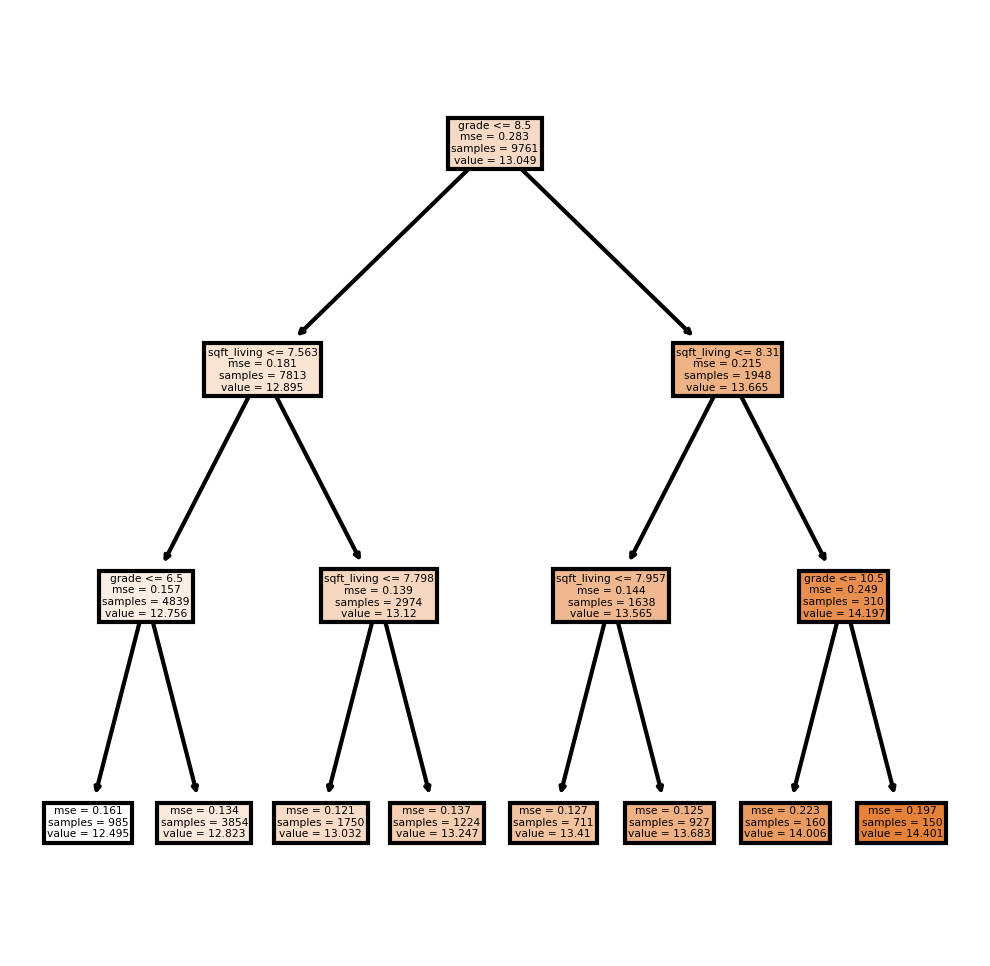

In [133]:
# Creating Tree Model
x11_train = pd.DataFrame(train_transformed[['sqft_living','grade']])
x11_validate = pd.DataFrame(validate_transformed[['sqft_living','grade']])
regr13 = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
regr13.fit(x11_train, y1)
#Predicting
y_pred3 = regr13.predict(x11_validate)

# Plotting the Tree
data_feature_names = ['sqft_living','grade']
cn = ['price']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(regr13, feature_names = data_feature_names, class_names = cn, filled = True)

# Computing the RMSE
rmse13 = np.sqrt(np.mean((np.array(y2)-y_pred3)**2))
print('The RMSE for the Regression Tree is:', round(rmse13,5))

# Computing the R-squared
r2_2 = r2_score(y2, y_pred3, multioutput='variance_weighted')
print('The R-squarred value for Price and sqft_living,grade is:', round(r2_2,5))

We get an RMSE score of 0.65 and an R-Squared score of 0.5.

## Final Model

In [150]:
# We select the Multiple Linear Regression Model with grade and sqft_living as our final Model, as we got the lowest RMSE score for it
# Let us apply the model on the testing dataset and see the results
# Preparing the the test data
test_transformed = pd.DataFrame()
test_transformed['price'] = np.log(test['price'])
test_transformed['sqft_living'] = np.log(test['sqft_living'])
test_transformed['grade'] = test['grade']

#Setting Variables
y_test = test_transformed['price']
x_test = test_transformed[['sqft_living','grade']]


# Making Predictions on Validation Dataset
y_pred_test = regr8.predict(x_test)

# Computing the RMSE
rmse14 = np.sqrt(np.mean((np.array(y_test)-y_pred_test)**2))
print('The RMSE for Price and sqft_living,grade is:', round(rmse14,5))

# Computing the R-squared
r2_3 = r2_score(y_test, y_pred_test, multioutput='variance_weighted')
print('The R-square for Price and sqft_living,grade is:', round(r2_3,5))
print('Intercept: ', regr8.intercept_)
print('Coefficient:', regr8.coef_)

The RMSE for Price and sqft_living,grade is: 0.76651
The R-square for Price and sqft_living,grade is: 0.37342
Intercept:  [8.2854241]
Coefficient: [[0.20414803 0.42360477]]


#### Interpretation of the Model

The Intercept being 8.285, for every 1% increase in the log transformed sqft_living, while keeping the grade constant, the log transformed price of the house increases by:

({(1 + 0.01)^0.20414803} - 1)*100 = (1.0020334050112284707 - 1)*100 = 0.20334 = 0.20%

The Intercept being 8.285, for every 1 unit increase in the grade, while keeping the log transformed sqft_living constant, the log transformed price of the house increases by:

(e^0.42360477 - 1)*100 = (1.52746 - 1)*100 = (0.52746*100) = 52.75%


## Conclusion

The actual prices have a positive skew. 
The R-squared of the final model wasn't high -> 0.37. 
It is very difficult to have a high R-squared value for a model with the given variables. Maybe adding in more variables to the data can help in predicting the House prices better. This goes with the intuition that the price of a house is not just dependent on the variables available in the dataset. The price of a house also depends on various external factors such as the prevailing economic situations in the region, personal bias, sentiments of the buyers and so on.  